Problem Statement: -

A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. m

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Understanding 

In [3]:
df=pd.read_csv("calories_consumed.csv")
df

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500
5,110,1600
6,128,1400
7,62,1900
8,600,2800
9,1100,3900


In [4]:
df.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [5]:
df.shape

(14, 2)

In [6]:
df.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [7]:
df.dtypes

Weight gained (grams)    int64
Calories Consumed        int64
dtype: object

In [8]:
df.isna().sum()

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [10]:
df.duplicated(['Weight gained (grams)']).sum()

1

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Weight gained (grams)  Calories Consumed
0                     108               1500
1                     200               2300
2                     900               3400
3                     200               2200
4                     300               2500
5                     110               1600
6                     128               1400
7                      62               1900
8                     600               2800
9                    1100               3900
10                    100               1670
11                    150               1900
12                    350               2700
13                    700               3000>

In [13]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


# Outliers Treatment

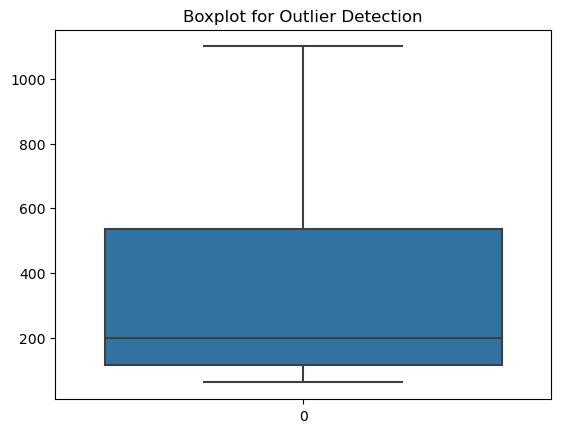

In [16]:
sns.boxplot(df['Weight gained (grams)'])
plt.title("Boxplot for Outlier Detection")
plt.show()

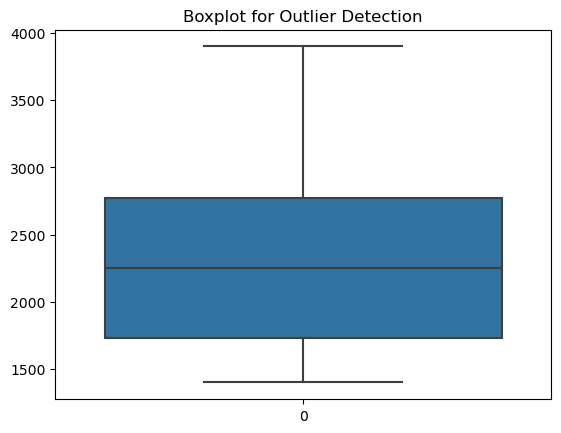

In [17]:
sns.boxplot(df['Calories Consumed'])
plt.title("Boxplot for Outlier Detection")
plt.show()

#there are no outliers present here

4.Exploratory Data Analysis (EDA):
       4.1 Summary.
       4.2 Univariate analysis.
       4.3 Bivariate analysis.

In [18]:
df.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [19]:
#Univariate Analysis

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


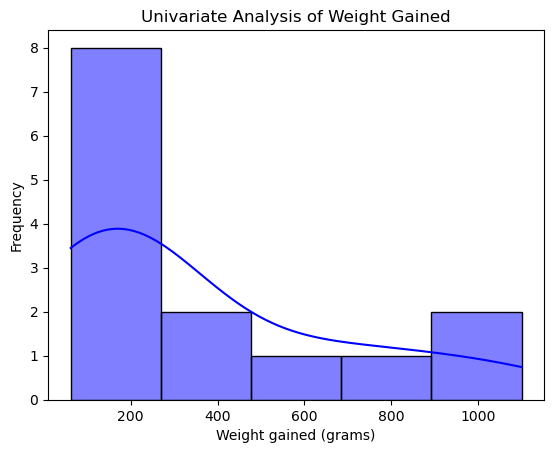

In [32]:
sns.histplot(df['Weight gained (grams)'], kde=True, color='blue')
plt.title('Univariate Analysis of Weight Gained')
plt.xlabel('Weight gained (grams)')
plt.ylabel('Frequency')
plt.show()

<Axes: >

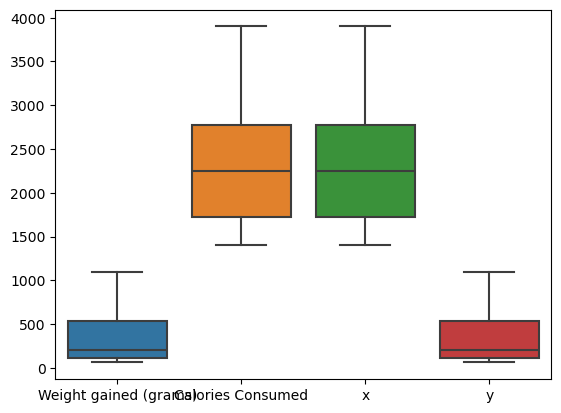

In [82]:
sns.boxplot(df)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


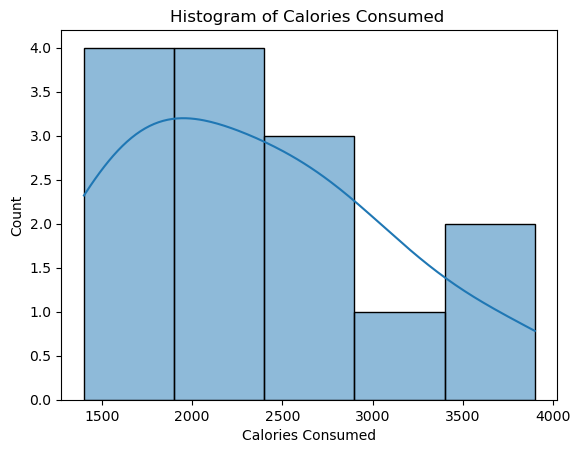

In [35]:
sns.histplot(df['Calories Consumed'],kde=True)
plt.title('Histogram of Calories Consumed ')
plt.show()

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_5544\3802274219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories Consumed'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Calories Consumed', ylabel='Density'>

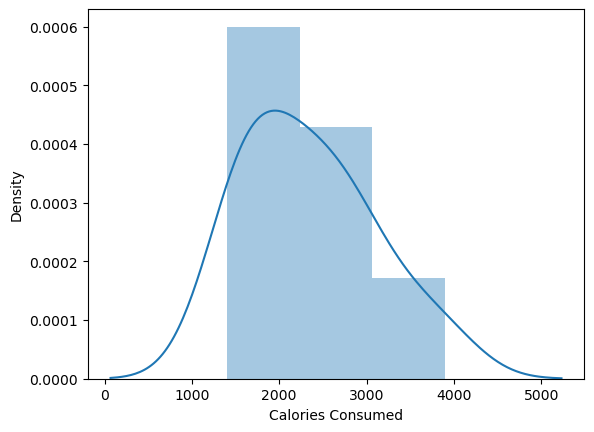

In [36]:
sns.distplot(df['Calories Consumed'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_5544\2882954410.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight gained (grams)'],kde=True)
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight gained (grams)', ylabel='Density'>

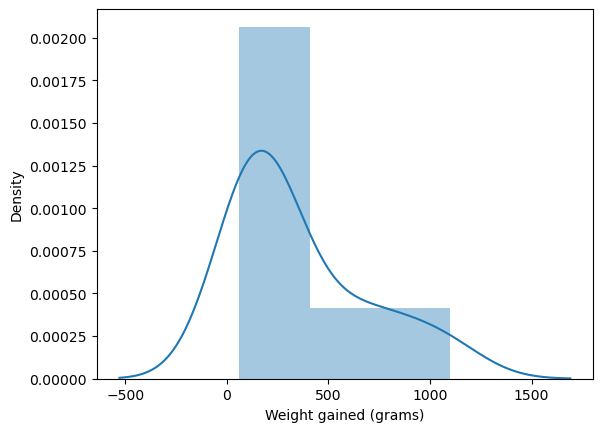

In [37]:
sns.distplot(df['Weight gained (grams)'],kde=True)

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_5544\67367720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories Consumed'],kde=False)


<Axes: xlabel='Calories Consumed'>

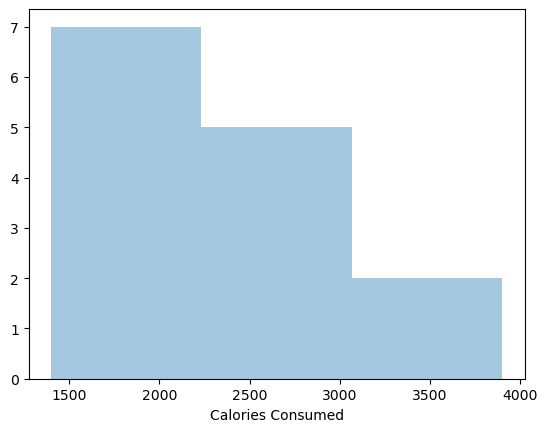

In [40]:
sns.distplot(df['Calories Consumed'],kde=False)

# Bivariate Analysis

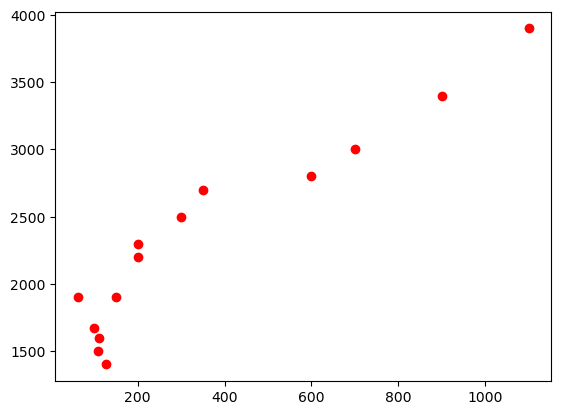

In [48]:
plt.scatter(x=df['Weight gained (grams)'],y=df['Calories Consumed'],color='red')

#here data is linear.as the values are if one increases the other increase.It is in positive direction

In [59]:
df['Calories Consumed'].cov(df['Weight gained (grams)'])

237669.4505494506

In [49]:
df.corr()

,Weight gained (grams),Calories Consumed
Weight gained (grams),1.000000,0.946991
Calories Consumed,0.946991,1.000000


In [55]:
df.kurtosis()

Weight gained (grams)    0.431272
Calories Consumed       -0.290481
dtype: float64

In [56]:
df.skew()

Weight gained (grams)    1.255737
Calories Consumed        0.654930
dtype: float64

<Axes: >

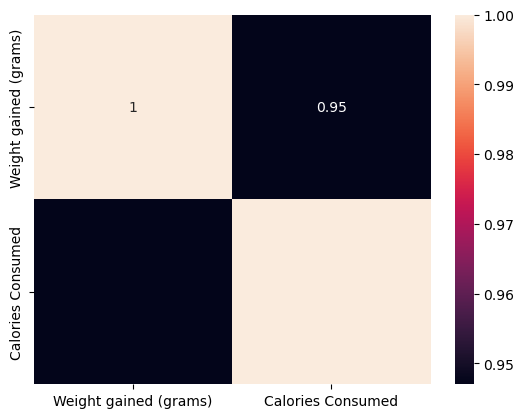

In [58]:
sns.heatmap(df.corr(),annot=True)

In [62]:
import statsmodels.formula.api as smf
df['x']=df['Calories Consumed']
df['y']=df['Weight gained (grams)']


In [65]:
model=smf.ols('y~x',data=df).fit()

In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           2.86e-07
Time:                        16:55:18   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.0

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [68]:
pred1=model.predict(df['x'])

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


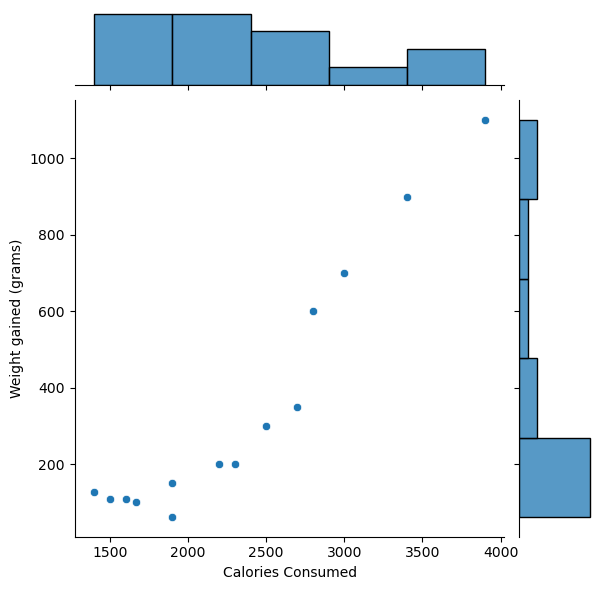

In [69]:
sns.jointplot(df,x='Calories Consumed',y='Weight gained (grams)')

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

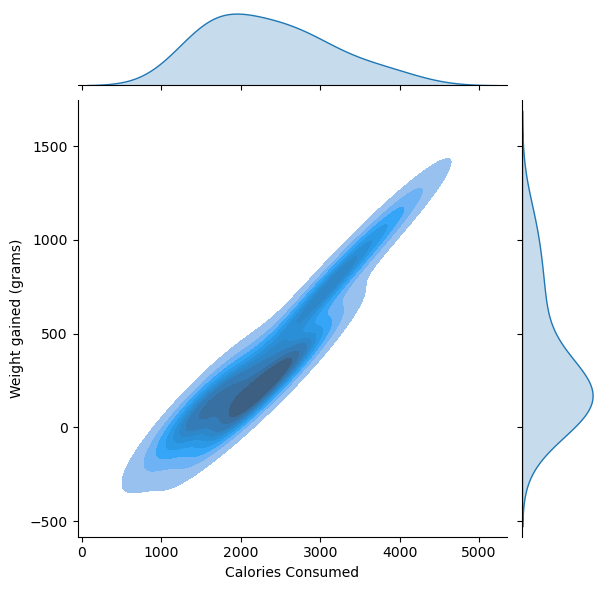

In [70]:
sns.jointplot(df,x='Calories Consumed',y='Weight gained (grams)',kind='kde',fill=True)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Density'>

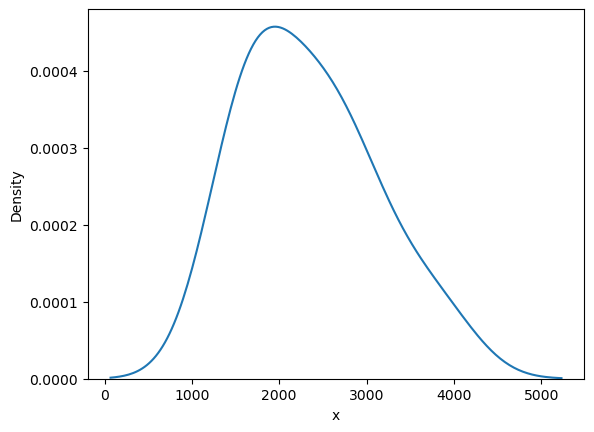

In [71]:
sns.kdeplot(df['x'])

In [72]:

from sklearn.metrics import r2_score 
r2_score(df['y'],pred1)

0.8967919708530552

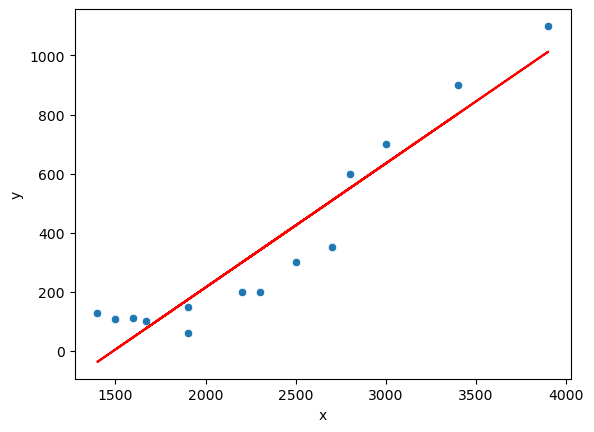

In [76]:
sns.scatterplot(df,x='x',y='y')
plt.plot(df['x'],pred1,color='red')

In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(df[['x']],df[['y']])

LinearRegression()

In [81]:
y_pred=lr.predict(df[['x']])
r2_score(df.y,y_pred)

0.8967919708530552